<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/Early-Stopping/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


<Axes: >

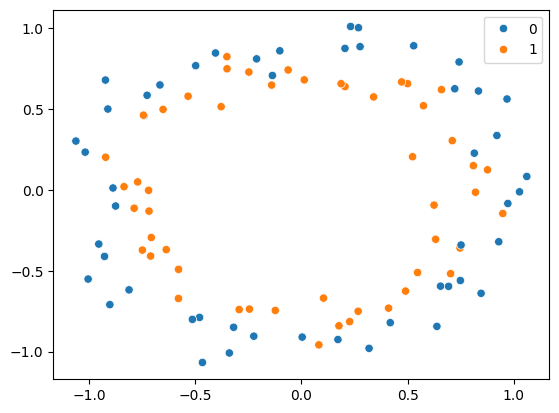

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#we can see overfiting
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

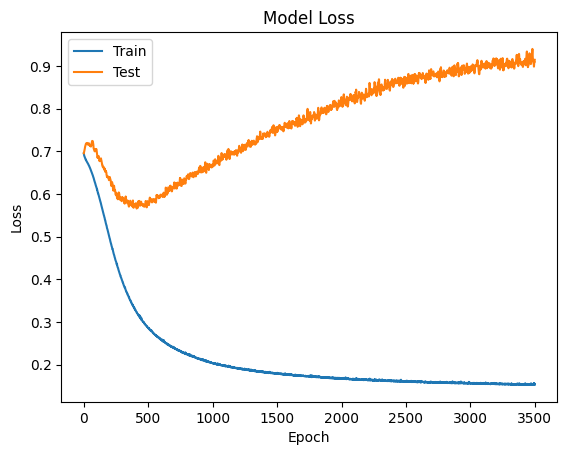

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

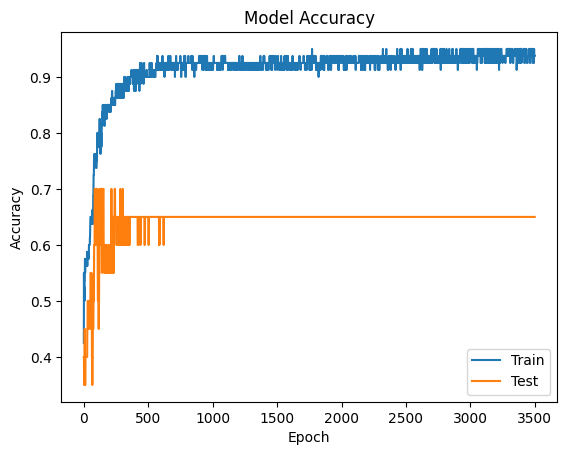

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

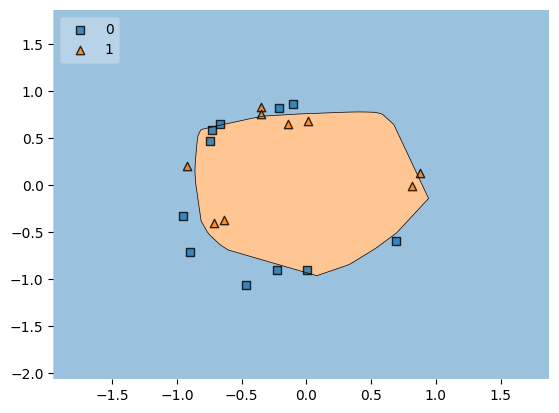

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)

#Early stopping

Early stopping is a common and widely accepted technique that helps prevent overfitting. It works by monitoring the model's performance on a validation set and stopping training when the validation error starts to increase or stops improving. This indicates that the model is beginning to overfit the training data.

In [11]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
#Early stopping
callback = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=False,
    verbose=1,
    mode ='auto',
    min_delta=0.00001,
    baseline=None
    )


In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4328 - loss: 0.6982 - val_accuracy: 0.6000 - val_loss: 0.6835
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4812 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6855
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4641 - loss: 0.6911 - val_accuracy: 0.5500 - val_loss: 0.6887
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4406 - loss: 0.6906 - val_accuracy: 0.5500 - val_loss: 0.6910
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4547 - loss: 0.6902 - val_accuracy: 0.5500 - val_loss: 0.6933
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4906 - loss: 0.6876 - val_accuracy: 0.6000 - val_loss: 0.6960
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5586 - loss: 0.6859 - val_accuracy: 0.5500 - val_loss: 0.6982
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5930 - loss: 0.6845 - val_accuracy: 0.5000 - 

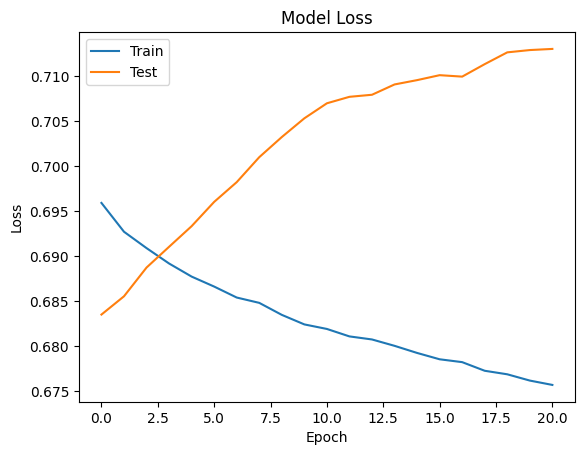

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

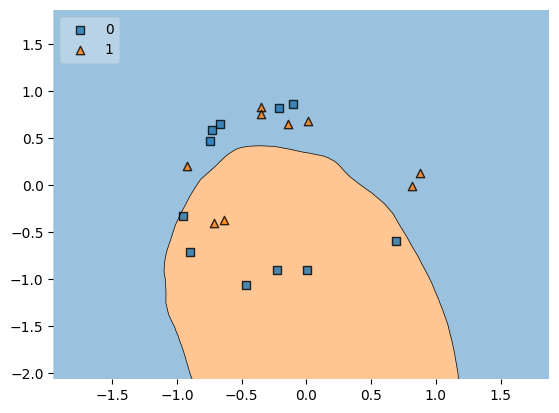

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)